# Урок 2. Инструменты работы и визуализации ч.1

Условие: дана таблица с колонками (id, name, salary, managerId), студентам необходимо написать код на spark, который создаст эту таблицу (данные указаны ниже) и в результате выдаст таблицу в которой будут имена сотрудников, которые зарабатывают больше своих менеджеров.

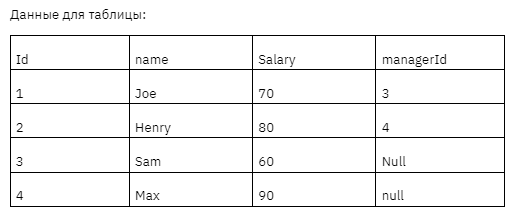

In [1]:
# Установка бибблиотеки pyspark

# %pip install pyspark - рекомендованный официальной документацией метод установки
!pip install pyspark
# %conda install pyspark

In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

print(pyspark.__version__)


3.5.1


In [3]:
# Импорт модулей

from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [4]:
# Создаем Spark сессию
spark = SparkSession.builder.appName("EmployeeSalary").getOrCreate()

Py4JError: An error occurred while calling None.org.apache.spark.sql.SparkSession. Trace:
py4j.Py4JException: Constructor org.apache.spark.sql.SparkSession([class org.apache.spark.SparkContext, class java.util.HashMap]) does not exist
	at py4j.reflection.ReflectionEngine.getConstructor(ReflectionEngine.java:179)
	at py4j.reflection.ReflectionEngine.getConstructor(ReflectionEngine.java:196)
	at py4j.Gateway.invoke(Gateway.java:237)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)



In [ ]:
# Создаем таблицу

# Данные для таблицы
data = [
    (1, "Joe", 70, 3),
    (2, "Henry", 80, 4),
    (3, "Sam", 60, None),
    (4, "Max", 90, None)
]

# Определяем схему таблицы
columns = ["Id", "name", "Salary", "managerId"]

# Создаем DataFrame
df = spark.createDataFrame(data, columns)

In [ ]:
df.show()

+---+-----+------+---------+
| Id| name|Salary|managerId|
+---+-----+------+---------+
|  1|  Joe|    70|        3|
|  2|Henry|    80|        4|
|  3|  Sam|    60|     NULL|
|  4|  Max|    90|     NULL|
+---+-----+------+---------+



In [ ]:
# Присоединяем DataFrame к самому себе, чтобы получить менеджеров
df_with_managers = df.alias("e1").join(
    df.alias("e2"),
    col("e1.managerId") == col("e2.Id"),
    "inner"
).select(
    col("e1.name").alias("Employee"),
    col("e1.Salary").alias("EmployeeSalary"),
    col("e2.name").alias("Manager"),
    col("e2.Salary").alias("ManagerSalary")
)

In [ ]:
df_with_managers.show()

+--------+--------------+-------+-------------+
|Employee|EmployeeSalary|Manager|ManagerSalary|
+--------+--------------+-------+-------------+
|     Joe|            70|    Sam|           60|
|   Henry|            80|    Max|           90|
+--------+--------------+-------+-------------+



In [ ]:
# Фильтруем сотрудников, у которых зарплата больше, чем у менеджеров
result_df = df_with_managers.filter(col("EmployeeSalary") > col("ManagerSalary")).select("Employee")

In [ ]:
# Показать результат
result_df.show()

+--------+
|Employee|
+--------+
|     Joe|
+--------+



In [ ]:
# Останавливаем Spark сессию
spark.stop()